In [3]:
import numpy as np
import ray
import matplotlib.pyplot as plt
import time
from utils import *
from procedures import *
plt.rcParams["font.sans-serif"] = "DejaVu Sans"
plt.rcParams["mathtext.default"]  = "it"
plt.rcParams["mathtext.fontset"]  = "dejavusans"

In [2]:
# define problem configurations used in EC.3.2
class EMCVGenerator(object):
    def __init__(self, n_alternatives, gamma, lamda, var, best_index=0):
        self.n_alternatives = n_alternatives
        self.gamma = gamma
        self.means = -(np.arange(n_alternatives)-1)/n_alternatives*lamda
        self.means[best_index] = gamma
        self.best_mean = gamma
        self.variances = np.ones(self.n_alternatives)*var
        self.stds = np.sqrt(self.variances)
        
    def get(self, index, n=1):
        return np.random.normal(self.means[index], self.stds[index], n)
        
    def syscount(self):
        return self.n_alternatives

In [3]:
def func1(n):
    return np.log2(n)

def func2(n):
    return np.sqrt(n)

def func3(n):
    return 0.1*n

In [4]:
# define problem configurations used in EC.3.2
class EMCVFuncGenerator(object):
    def __init__(self, n_alternatives, gamma, func, var, best_index=0):
        self.n_alternatives = n_alternatives
        self.gamma = gamma
        self.means = -(np.arange(n_alternatives)-1)/n_alternatives*func(n_alternatives)
        self.means[best_index] = gamma
        self.best_mean = gamma
        self.variances = np.ones(self.n_alternatives)*var
        self.stds = np.sqrt(self.variances)
        
    def get(self, index, n=1):
        return np.random.normal(self.means[index], self.stds[index], n)
        
    def syscount(self):
        return self.n_alternatives

In [10]:
num_cpus=96
ray.shutdown()
ray.init(num_cpus=num_cpus, ignore_reinit_error=True)

2023-08-06 00:32:05,646	INFO worker.py:1529 -- Started a local Ray instance. View the dashboard at http://127.0.0.1:8265 


Python version:,3.8.15
Ray version:,2.2.0
Dashboard:,http://127.0.0.1:8265


In [6]:
n_replications = 1000
 
min_power = 3
max_power = 16
base = 2

gamma = 0.1
var = 1
lamda = -1

In [12]:
EFG_results = []

seed = 2023080501
np.random.seed(seed)
rng = np.random.default_rng(seed)

n0 = 80
ng = 20

for lamda in [0, 0.2, 2]:
    for power in np.arange(min_power, max_power+1):
        print("This problem has {} alternatives".format(base**power))
        generators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]

        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        EFG_results.append(PCS)
EFG_results

for func in [func2, func3]:
    for power in np.arange(min_power, max_power+1):
        print("This problem has {} alternatives".format(base**power))
        generators =   [EMCVFuncGenerator(base**power, gamma, func, var) for i in range(n_replications)]
        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        EFG_results.append(PCS)
EFG_results

This problem has 8 alternatives
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 00:32:13 2023
PCS:0.406, PGS:0.406
Total time used: 1.5701947212219238s, simulation ends at Sun Aug  6 00:32:13 2023
This problem has 16 alternatives
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 00:32:15 2023
PCS:0.35, PGS:0.35
Total time used: 1.5097465515136719s, simulation ends at Sun Aug  6 00:32:15 2023
This problem has 32 alternatives
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 00:32:16 2023
PCS:0.291, PGS:0.291
Total time used: 1.4982545375823975s, simulation ends at Sun Aug  6 00:32:17 2023
This problem has 64 alternatives
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 00:32:18 2023
PCS:0.229, PGS:0.229
Total time used: 1.4921691417694092s, simulation ends at Sun Aug  6 00:32:18 2023
This problem has 128 alternatives
--

Start to simulate... at Sun Aug  6 00:53:24 2023
PCS:0.738, PGS:0.738
Total time used: 1.687450647354126s, simulation ends at Sun Aug  6 00:53:24 2023
This problem has 1024 alternatives
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 00:53:26 2023
PCS:0.73, PGS:0.73
Total time used: 2.578124761581421s, simulation ends at Sun Aug  6 00:53:27 2023
This problem has 2048 alternatives
--------New experiments with  k=2048----------------------
Start to simulate... at Sun Aug  6 00:53:29 2023
PCS:0.729, PGS:0.729
Total time used: 5.187371492385864s, simulation ends at Sun Aug  6 00:53:32 2023
This problem has 4096 alternatives
--------New experiments with  k=4096----------------------
Start to simulate... at Sun Aug  6 00:53:34 2023
PCS:0.684, PGS:0.684
Total time used: 10.625311851501465s, simulation ends at Sun Aug  6 00:53:43 2023
This problem has 8192 alternatives
--------New experiments with  k=8192----------------------
Start to simulate... 

--------New experiments with  k=32768----------------------
Start to simulate... at Sun Aug  6 01:15:44 2023
PCS:0.869, PGS:0.869
Total time used: 124.4872989654541s, simulation ends at Sun Aug  6 01:17:46 2023
This problem has 65536 alternatives
--------New experiments with  k=65536----------------------
Start to simulate... at Sun Aug  6 01:17:49 2023
PCS:0.867, PGS:0.867
Total time used: 391.8222072124481s, simulation ends at Sun Aug  6 01:24:19 2023


[0.406,
 0.35,
 0.291,
 0.229,
 0.197,
 0.218,
 0.193,
 0.174,
 0.177,
 0.179,
 0.169,
 0.197,
 0.188,
 0.185,
 0.635,
 0.618,
 0.591,
 0.562,
 0.545,
 0.539,
 0.537,
 0.565,
 0.552,
 0.555,
 0.55,
 0.541,
 0.521,
 0.538,
 0.78,
 0.807,
 0.813,
 0.833,
 0.796,
 0.779,
 0.738,
 0.73,
 0.729,
 0.684,
 0.702,
 0.673,
 0.658,
 0.673,
 0.789,
 0.819,
 0.836,
 0.849,
 0.859,
 0.851,
 0.85,
 0.832,
 0.809,
 0.802,
 0.782,
 0.777,
 0.768,
 0.724,
 0.774,
 0.797,
 0.835,
 0.834,
 0.873,
 0.867,
 0.866,
 0.862,
 0.874,
 0.862,
 0.875,
 0.853,
 0.869,
 0.867]

In [13]:
Greedy_results = []

seed = 2023080502
np.random.seed(seed)
rng = np.random.default_rng(seed)

n0 = 1
ng = 99

for lamda in [0, 0.2, 2]:
    for power in np.arange(min_power, max_power+1):
        print("This problem has {} alternatives".format(base**power))
        generators =   [EMCVGenerator(base**power, gamma, lamda, var) for i in range(n_replications)]

        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        Greedy_results.append(PCS)
Greedy_results

for func in [func2, func3]:
    for power in np.arange(min_power, max_power+1):
        print("This problem has {} alternatives".format(base**power))
        generators =   [EMCVFuncGenerator(base**power, gamma, func, var) for i in range(n_replications)]
        PCS, PGS = parallel_experiments(rng, generators, policy=EFG, remote_policy=remote_EFG, args={"n0":n0, "ng":ng})
        Greedy_results.append(PCS)
Greedy_results

This problem has 8 alternatives
--------New experiments with  k=8----------------------
Start to simulate... at Sun Aug  6 01:24:21 2023
PCS:0.257, PGS:0.257
Total time used: 1.605276346206665s, simulation ends at Sun Aug  6 01:24:21 2023
This problem has 16 alternatives
--------New experiments with  k=16----------------------
Start to simulate... at Sun Aug  6 01:24:22 2023
PCS:0.16, PGS:0.16
Total time used: 1.6280982494354248s, simulation ends at Sun Aug  6 01:24:22 2023
This problem has 32 alternatives
--------New experiments with  k=32----------------------
Start to simulate... at Sun Aug  6 01:24:24 2023
PCS:0.135, PGS:0.135
Total time used: 1.6479203701019287s, simulation ends at Sun Aug  6 01:24:24 2023
This problem has 64 alternatives
--------New experiments with  k=64----------------------
Start to simulate... at Sun Aug  6 01:24:25 2023
PCS:0.129, PGS:0.129
Total time used: 1.656233310699463s, simulation ends at Sun Aug  6 01:24:26 2023
This problem has 128 alternatives
----

Start to simulate... at Sun Aug  6 03:03:43 2023
PCS:0.215, PGS:0.215
Total time used: 5.936535120010376s, simulation ends at Sun Aug  6 03:03:48 2023
This problem has 1024 alternatives
--------New experiments with  k=1024----------------------
Start to simulate... at Sun Aug  6 03:03:50 2023
PCS:0.186, PGS:0.186
Total time used: 11.90430998802185s, simulation ends at Sun Aug  6 03:04:00 2023
This problem has 2048 alternatives
--------New experiments with  k=2048----------------------
Start to simulate... at Sun Aug  6 03:04:01 2023
PCS:0.169, PGS:0.169
Total time used: 23.77735710144043s, simulation ends at Sun Aug  6 03:04:23 2023
This problem has 4096 alternatives
--------New experiments with  k=4096----------------------
Start to simulate... at Sun Aug  6 03:04:25 2023
PCS:0.166, PGS:0.166
Total time used: 49.210625886917114s, simulation ends at Sun Aug  6 03:05:13 2023
This problem has 8192 alternatives
--------New experiments with  k=8192----------------------
Start to simulate..

--------New experiments with  k=32768----------------------
Start to simulate... at Sun Aug  6 04:49:07 2023
PCS:0.403, PGS:0.403
Total time used: 591.581868648529s, simulation ends at Sun Aug  6 04:58:57 2023
This problem has 65536 alternatives
--------New experiments with  k=65536----------------------
Start to simulate... at Sun Aug  6 04:59:00 2023
PCS:0.43, PGS:0.43
Total time used: 1887.2882130146027s, simulation ends at Sun Aug  6 05:30:25 2023


[0.257,
 0.16,
 0.135,
 0.129,
 0.12,
 0.132,
 0.119,
 0.156,
 0.121,
 0.139,
 0.136,
 0.118,
 0.132,
 0.129,
 0.303,
 0.282,
 0.213,
 0.195,
 0.157,
 0.173,
 0.153,
 0.165,
 0.146,
 0.147,
 0.137,
 0.129,
 0.142,
 0.141,
 0.498,
 0.447,
 0.364,
 0.307,
 0.275,
 0.261,
 0.215,
 0.186,
 0.169,
 0.166,
 0.145,
 0.14,
 0.134,
 0.139,
 0.545,
 0.497,
 0.458,
 0.436,
 0.429,
 0.385,
 0.35,
 0.328,
 0.299,
 0.283,
 0.254,
 0.239,
 0.218,
 0.242,
 0.406,
 0.414,
 0.399,
 0.424,
 0.406,
 0.418,
 0.428,
 0.401,
 0.392,
 0.39,
 0.443,
 0.398,
 0.403,
 0.43]

In [7]:
# results drawn from the above experiments for producing the Figure EC3

# EFG_results = [0.406, 0.35, 0.291, 0.229, 0.197, 0.218, 0.193, 0.174, 0.177, 0.179, 
#                0.169, 0.197, 0.188, 0.185, 0.635, 0.618, 0.591, 0.562, 0.545, 0.539, 
#                0.537, 0.565, 0.552, 0.555, 0.55, 0.541, 0.521, 0.538, 0.78, 0.807, 0.813, 
#                0.833, 0.796, 0.779, 0.738, 0.73, 0.729, 0.684, 0.702, 0.673, 0.658, 0.673, 
#                0.789, 0.819, 0.836, 0.849, 0.859, 0.851, 0.85, 0.832, 0.809, 0.802, 0.782, 
#                0.777, 0.768, 0.724, 0.774, 0.797, 0.835, 0.834, 0.873, 0.867, 0.866, 0.862, 
#                0.874, 0.862, 0.875, 0.853, 0.869, 0.867]

# Greedy_results = [0.257, 0.16, 0.135, 0.129, 0.12, 0.132, 0.119, 0.156, 0.121, 0.139, 0.136, 
#                   0.118, 0.132, 0.129, 0.303, 0.282, 0.213, 0.195, 0.157, 0.173, 0.153, 0.165, 
#                   0.146, 0.147, 0.137, 0.129, 0.142, 0.141, 0.498, 0.447, 0.364, 0.307, 0.275, 
#                   0.261, 0.215, 0.186, 0.169, 0.166, 0.145, 0.14, 0.134, 0.139, 0.545, 0.497, 
#                   0.458, 0.436, 0.429, 0.385, 0.35, 0.328, 0.299, 0.283, 0.254, 0.239, 0.218, 
#                   0.242, 0.406, 0.414, 0.399, 0.424, 0.406, 0.418, 0.428, 0.401, 0.392, 0.39, 
#                   0.443, 0.398, 0.403, 0.43]

In [8]:
EFG_results = np.array(EFG_results).reshape(-1, max_power-min_power+1)
Greedy_results = np.array(Greedy_results).reshape(-1, max_power-min_power+1)

In [10]:
results_list = [Greedy_results, EFG_results]

In [11]:
labels = ["$\\lambda={}$".format(lamda) for lamda in [0, 0.2, 2, "\sqrt{k}", "0.1k"]]

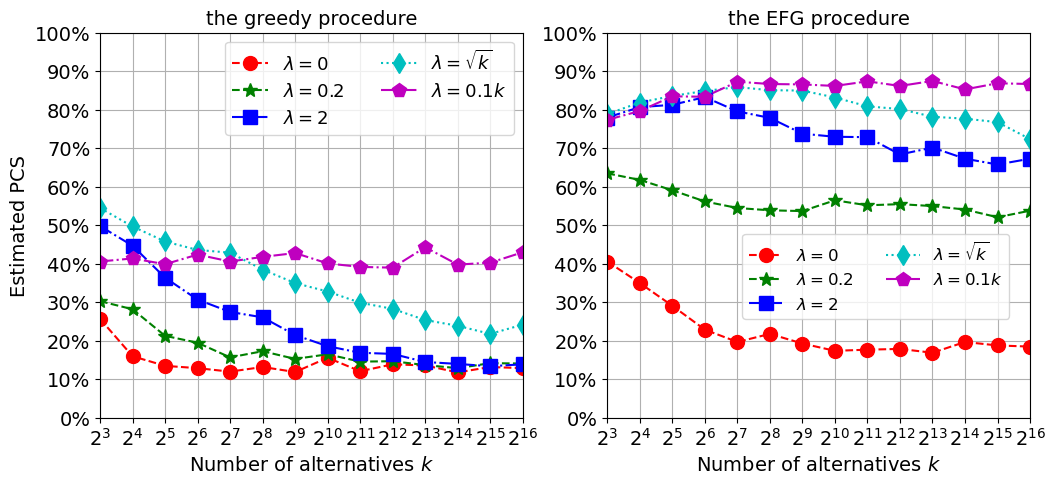

In [12]:
fontsize = 14
powers = np.arange(min_power, max_power+1)

colors = ["r" ,"g", "b", "c", "m"]
markers = ["o","*", "s", "d", "p",  "D", "p"]
line_styles = ["--","--", "-.", ":", "-."]


fig = plt.figure(figsize= (12, 5))


fig_plots = [(1,2,1), (1,2, 2)]

titles = ["the greedy procedure", "the EFG procedure"]
powers = np.arange(min_power, max_power+1)


for i, fig_plot in enumerate(fig_plots):
    
    ax = fig.add_subplot(*fig_plots[i])
    
    results = results_list[i]

    for j, result in enumerate(results):
        plt.plot(powers, result, line_styles[j], marker=markers[j], markersize=10,  color=colors[j], label=labels[j])
    
    plt.xlim(min_power, max_power)
    xticks = np.arange(min_power, max_power+1)
    xticklabels = ["2^{"+str(power)+"}" for power in xticks]
    #xticklabels = [str(2 ** (power)) for power in xticks]
    xticklabels = ["$"+power_label+"$" for power_label in xticklabels]
    plt.xticks(powers, xticklabels,fontsize=fontsize)

    min_result = np.min(results)
    max_result = np.max(results)

    min_level = (min_result // 0.1-1)*0.1
    max_level = (max_result // 0.1 + 1)*0.1

    plt.ylim(0.0, 1.0)
    yticks = np.arange(0.0, 1+0.1, 0.1)
    yticklabels = ["%.0f"%(tick*100)+"%" for tick in yticks]
    plt.yticks(yticks, yticklabels, fontsize=fontsize)
        
    if i == 0:
        ax.legend(prop={"size":fontsize-1}, ncol=2, markerscale=1.0)
    if i == 1:
        ax.legend(prop={"size":fontsize-2}, ncol=2, bbox_to_anchor=(0.3, 0.5), markerscale=1.0)
    ax.set_xlabel("Number of alternatives $k$", size=fontsize)
    if i == 0:
        ax.set_ylabel("Estimated PCS", size=fontsize)
    plt.title(titles[i], fontsize=fontsize)
    plt.grid(0.2)

plt.savefig("Figure_EC3.pdf", bbox_inches ="tight")
plt.show()